In [ ]:
import pandas as pd

r = pd.read_csv( 'ratings.csv' )
tr = pd.read_csv( 'to_read.csv' )
b = pd.read_csv( 'books.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')


In [2]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [3]:
len(r)

5976479

<AxesSubplot:>

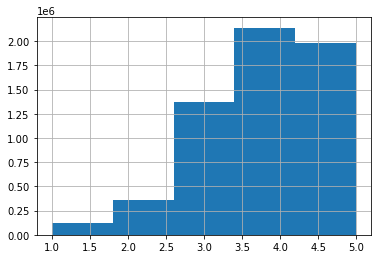

In [4]:
r.rating.hist( bins = 5 )

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### To read
These are the books users marked "to read".


In [5]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [6]:
len(tr)

912705

Most books have been marked to read by somebody (9986 over 10000). Majority of the users have some books marked to read. (48871 over 53424)

In [7]:
len(tr.book_id.unique())

9986

In [8]:
len(tr.user_id.unique())

48871

### Books

In [9]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [38]:
b.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [35]:
b['books_count'].sum()

757127

In [36]:
b['ratings_1'].sum()

13450406

Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [10]:
len(b)

10000

### User and book IDs

In [11]:
r.user_id.max()

53424

In [12]:
r.book_id.max()

10000

The IDs are contiguous.

In [13]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [14]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [15]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [16]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [17]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

### Tags

In [18]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [19]:
len(t)

34252

In [20]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [21]:
len(bt)

999912

Let us merge tag names into tag applications.

In [22]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [23]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [34]:
bt

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...
...,...,...,...,...,...
999907,675614,33057,7,ya-witches,"Book of Shadows (Sweep, #1)"
999908,675614,32624,6,witches-and-magic,"Book of Shadows (Sweep, #1)"
999909,675614,32612,6,witch-books,"Book of Shadows (Sweep, #1)"
999910,675614,32625,5,witches-and-warlocks,"Book of Shadows (Sweep, #1)"


In [37]:
bt[bt['goodreads_book_id']==1]

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...
...,...,...,...,...,...
95,1,5444,266,bookshelf,Harry Potter and the Half-Blood Prince (Harry ...
96,1,18913,265,magical,Harry Potter and the Half-Blood Prince (Harry ...
97,1,11595,264,favs,Harry Potter and the Half-Blood Prince (Harry ...
98,1,6829,263,childhood-books,Harry Potter and the Half-Blood Prince (Harry ...


In [24]:
#counts tag occurrences all books aggregated
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [53]:
tags_per_book = bt.groupby( 'goodreads_book_id' ).goodreads_book_id.apply( lambda x: len( x ))
tags_per_book.describe()
# almost books have 100 tags

count    10000.000000
mean        99.991200
std          0.584429
min         56.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: goodreads_book_id, dtype: float64

In [25]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [26]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
227396,39963,21469,10,newbery-honors,A Long Way from Chicago (A Long Way from Chica...
801294,12216302,30574,18811,to-read,"Cold Days (The Dresden Files, #14)"
114500,13872,30574,39758,to-read,Geek Love
14400,1842,30574,49043,to-read,"Guns, Germs, and Steel: The Fates of Human Soc..."
626312,3128411,3389,119,audiobook,"Bone Crossed (Mercy Thompson, #4)"
52390,6288,10059,1750,dystopia,The Road
206,3,14017,8559,harry-potter,Harry Potter and the Sorcerer's Stone (Harry P...
446703,234225,8717,12850,currently-reading,Dune (Dune Chronicles #1)
983912,25899336,30574,184635,to-read,When Breath Becomes Air
122153,15014,5951,623,business,Crucial Conversations: Tools for Talking When ...


In [50]:
bt['count'].sum()

208851258

These are the most popular tags:

In [44]:
#counts books per tag
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 100 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
                     ... 
nook                 1987
library-book         1977
chick-lit            1974
20th-century         1964
paranormal           1941
Name: tag_name, Length: 100, dtype: int64

In [60]:
#counts tag occurences
tag_occ_counts = bt.groupby( 'tag_name' ).sum()
tag_occ_counts.head( 100 )

,goodreads_book_id,tag_id,count
tag_name,,,
-,24372785,0,24
--1-,1251703,2,6
--10-,513367,2,3
--12-,5552,3,3
--122-,168814,4,3
...,...,...,...
01_best-books,1563413,95,1
02-500-750,369110,96,1
02-black-exp,290039,97,1


In [66]:
occ_count=bt.groupby(['tag_name', 'tag_id'])['count'].agg('sum').sort_values( ascending = False )
occ_count.head(50)

tag_name            tag_id
to-read             30574     140718761
currently-reading   8717        7507958
favorites           11557       4503173
fiction             11743       3688819
fantasy             11305       3548157
young-adult         33114       1848306
classics            7457        1756920
books-i-own         5207        1317235
romance             26138       1231926
owned               22743       1224279
ya                  32989        898334
mystery             20939        872282
non-fiction         21689        857901
historical-fiction  14487        815421
series              27199        782637
science-fiction     26837        703866
sci-fi              26771        597325
paranormal          22973        542559
kindle              17213        506882
contemporary        8055         486001
book-club           4949         446685
library             18045        429171
favourites          11590        423289
owned-books         22753        417384
horror       

In [75]:
bt2 = bt[~bt['tag_name'].isin(['to-read', 'currently-reading', 'favorites', 'books-i-own', 'owned', 'kindle', 'book-club',
                       'library', 'favourites', 'owned-books', 'default', 'audiobook', 'to-buy', 'audiobooks', 
                       'ebook', 'audio', 'my-books'])]
# , 'ebooks', 'i-own', 'read-in-2015', 'wish-list'

In [76]:
bt2

,goodreads_book_id,tag_id,count,tag_name,title
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...
5,1,11743,9954,fiction,Harry Potter and the Half-Blood Prince (Harry ...
6,1,14017,7169,harry-potter,Harry Potter and the Half-Blood Prince (Harry ...
9,1,32989,4364,ya,Harry Potter and the Half-Blood Prince (Harry ...
...,...,...,...,...,...
999907,675614,33057,7,ya-witches,"Book of Shadows (Sweep, #1)"
999908,675614,32624,6,witches-and-magic,"Book of Shadows (Sweep, #1)"
999909,675614,32612,6,witch-books,"Book of Shadows (Sweep, #1)"
999910,675614,32625,5,witches-and-warlocks,"Book of Shadows (Sweep, #1)"


In [77]:
occ_count2 = bt2.groupby(['tag_name', 'tag_id'])['count'].agg('sum').sort_values( ascending = False )
occ_count2.head(50)

tag_name            tag_id
fiction             11743     3688819
fantasy             11305     3548157
young-adult         33114     1848306
classics            7457      1756920
romance             26138     1231926
ya                  32989      898334
mystery             20939      872282
non-fiction         21689      857901
historical-fiction  14487      815421
series              27199      782637
science-fiction     26837      703866
sci-fi              26771      597325
paranormal          22973      542559
contemporary        8055       486001
horror              14821      415467
urban-fantasy       31617      374689
nonfiction          21773      371049
adult               1642       337222
classic             7404       334113
childrens           6953       315716
graphic-novels      13561      313560
thriller            30358      309276
vampires            31745      300730
adventure           1691       295933
history             14552      291366
dystopian           100

In [95]:
bt3 = bt2[~bt2['tag_name'].isin(['ebooks', 'i-own', 'read-in-2015', 'wish-list', 'my-library','read-in-2016', 
                                 'read-in-2014', 'books', 'english', 'favorite-books', 'e-books', 'audio-book', 
                                 'read-in-2017', 'read-in-2013', 're-read', 'audible', 'favorite', 
                                 'all-time-favorites','own-it','read-in-2012', 'audio-books', 'e-book', 'abandoned',
                                 '5-stars', 'did-not-finish', '1001-books', 'american', 'read-2015'])]

In [96]:
bt3

,goodreads_book_id,tag_id,count,tag_name,title
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...
5,1,11743,9954,fiction,Harry Potter and the Half-Blood Prince (Harry ...
6,1,14017,7169,harry-potter,Harry Potter and the Half-Blood Prince (Harry ...
9,1,32989,4364,ya,Harry Potter and the Half-Blood Prince (Harry ...
...,...,...,...,...,...
999907,675614,33057,7,ya-witches,"Book of Shadows (Sweep, #1)"
999908,675614,32624,6,witches-and-magic,"Book of Shadows (Sweep, #1)"
999909,675614,32612,6,witch-books,"Book of Shadows (Sweep, #1)"
999910,675614,32625,5,witches-and-warlocks,"Book of Shadows (Sweep, #1)"


In [97]:
occ_count3 = bt3.groupby(['tag_name', 'tag_id'])['count'].agg('sum').sort_values( ascending = False )

In [108]:
occ_count3.head(60)

tag_name              tag_id
fiction               11743     3688819
fantasy               11305     3548157
young-adult           33114     1848306
classics              7457      1756920
romance               26138     1231926
ya                    32989      898334
mystery               20939      872282
non-fiction           21689      857901
historical-fiction    14487      815421
series                27199      782637
science-fiction       26837      703866
sci-fi                26771      597325
paranormal            22973      542559
contemporary          8055       486001
horror                14821      415467
urban-fantasy         31617      374689
nonfiction            21773      371049
adult                 1642       337222
classic               7404       334113
childrens             6953       315716
graphic-novels        13561      313560
thriller              30358      309276
vampires              31745      300730
adventure             1691       295933
history    

In [82]:
occ_count3.describe()

count    3.423000e+04
mean     1.404825e+03
std      3.514121e+04
min      0.000000e+00
25%      3.000000e+00
50%      1.000000e+01
75%      5.200000e+01
max      3.688819e+06
Name: count, dtype: float64

In [33]:
tag_counts.sum()

999912